In [2]:
## Import the library
import pandas as pd
import numpy  as np
import matplotlib.pyplot as   plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
sns.set()
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## load Data

In [3]:
hr=pd.read_csv("HR-Employee-Attrition.csv")

In [4]:
hr.sample(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
585    23       Yes      Travel_Rarely       1243  Research & Development   
480    30       Yes  Travel_Frequently        448                   Sales   
142    38        No      Travel_Rarely        364  Research & Development   
736    48        No      Travel_Rarely       1355  Research & Development   
441    42        No  Travel_Frequently       1474  Research & Development   
1335   39        No      Travel_Rarely        835  Research & Development   
1081   35        No      Travel_Rarely       1029  Research & Development   
1371   56        No      Travel_Rarely       1443                   Sales   
971    51        No      Travel_Rarely       1405  Research & Development   
76     35        No      Travel_Rarely        776                   Sales   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
585                  6          3     Life Sciences              1   
480                 12          4     Life Sciences              1   
142                  3          5  Technical Degree              1   
736                  4          4     Life Sciences              1   
441                  5          2             Other              1   
1335                19          4             Other              1   
1081                16          3     Life Sciences              1   
1371                11          5         Marketing              1   
971                 11          2  Technical Degree              1   
76                   1          4         Marketing              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
585              811                        3    Male          63   
480              648                        2    Male          74   
142              193                        4  Female          32   
736             1024                        3    Male          78   
441              591                        2    Male          97   
1335            1871                        4    Male          41   
1081            1529                        4  Female          91   
1371            1935                        4  Female          89   
971             1367                        4  Female          82   
76               100                        3    Male          32   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
585                4         1      Laboratory Technician                1   
480                2         1       Sales Representative                1   
142                3         2         Research Scientist                3   
736                2         3  Healthcare Representative                3   
441                3         1      Laboratory Technician                3   
1335               3         2         Research Scientist                4   
1081               2         3  Healthcare Representative                2   
1371               2         2            Sales Executive                1   
971                2         4     Manufacturing Director                2   
76                 2         2            Sales Executive                1   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
585        Married           1601         3445                   1      Y   
480        Married           2033        14470                   1      Y   
142         Single           4317         2302                   3      Y   
736         Single          10999        22245                   7      Y   
441        Married           2093         9260                   4      Y   
1335      Divorced           3902         5141                   8      Y   
1081        Single           8606        21195                   1      Y   
1371       Married           5380        20328                   4      Y   
971         Single          13142        24439                   3      Y  

## Explortatory Data Analyses

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
hr.duplicated().sum()

0

In [7]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
hr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
for col in hr.columns:
    
    # Check column dtype
    if hr[col].dtype == 'object':  
        
        # Column details
        print(f"Column: {col}")
        
        # Number of unique values
        print(f"Unique values: {hr[col].unique()}")
        
        # Value counts
        print(hr[col].value_counts())
        
        # Separator
        print("="*40)

Column: Attrition
Unique values: ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
Column: BusinessTravel
Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Column: Department
Unique values: ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Column: EducationField
Unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Column: Gender
Unique values: ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
Column: JobRole
Unique values: ['Sales Executive' 'Research Scientist' 'Laboratory T

In [10]:
for col in hr.columns:
    
    # Check column numiric
    if hr[col].dtype != 'object':  
        
        # Column details
        print(f"Column: {col}")
        
        # max & min values
        print(f"max: {hr[col].max()}",f"min: {hr[col].min()}")
                        
        # Separator
        print("="*40)

Column: Age
max: 60 min: 18
Column: DailyRate
max: 1499 min: 102
Column: DistanceFromHome
max: 29 min: 1
Column: Education
max: 5 min: 1
Column: EmployeeCount
max: 1 min: 1
Column: EmployeeNumber
max: 2068 min: 1
Column: EnvironmentSatisfaction
max: 4 min: 1
Column: HourlyRate
max: 100 min: 30
Column: JobInvolvement
max: 4 min: 1
Column: JobLevel
max: 5 min: 1
Column: JobSatisfaction
max: 4 min: 1
Column: MonthlyIncome
max: 19999 min: 1009
Column: MonthlyRate
max: 26999 min: 2094
Column: NumCompaniesWorked
max: 9 min: 0
Column: PercentSalaryHike
max: 25 min: 11
Column: PerformanceRating
max: 4 min: 3
Column: RelationshipSatisfaction
max: 4 min: 1
Column: StandardHours
max: 80 min: 80
Column: StockOptionLevel
max: 3 min: 0
Column: TotalWorkingYears
max: 40 min: 0
Column: TrainingTimesLastYear
max: 6 min: 0
Column: WorkLifeBalance
max: 4 min: 1
Column: YearsAtCompany
max: 40 min: 0
Column: YearsInCurrentRole
max: 18 min: 0
Column: YearsSinceLastPromotion
max: 15 min: 0
Column: YearsWithC

In [11]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
columns_to_drop = ['EmployeeCount','EmployeeNumber','Over18','StandardHours']

# Drop columns
for col in columns_to_drop:
    hr.drop(col, axis=1, inplace=True)



## Univariate Analyses 

In [13]:
obj=hr.select_dtypes(include="object")
num=hr.select_dtypes(exclude="object")

In [14]:
obj_col=list(hr.select_dtypes(include="object").columns)
num_col=list(hr.select_dtypes(exclude="object").columns)

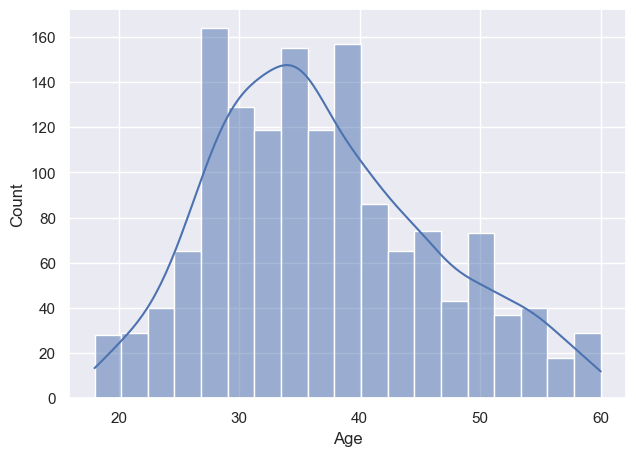

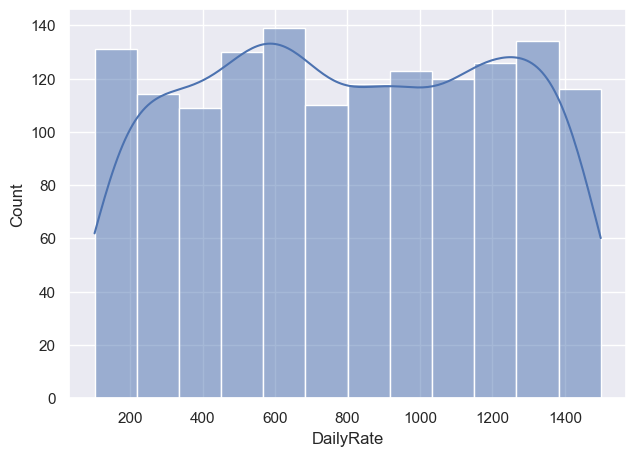

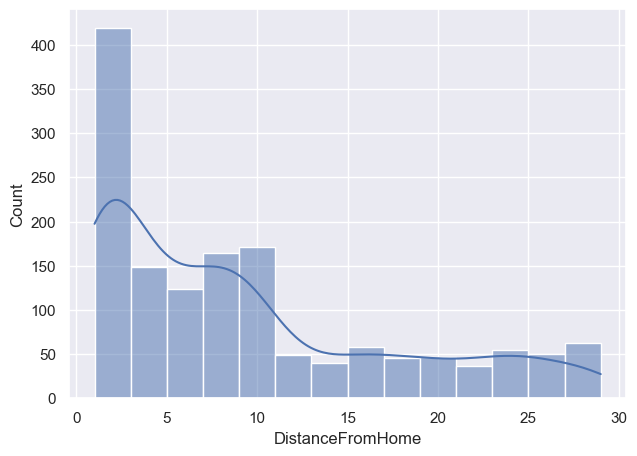

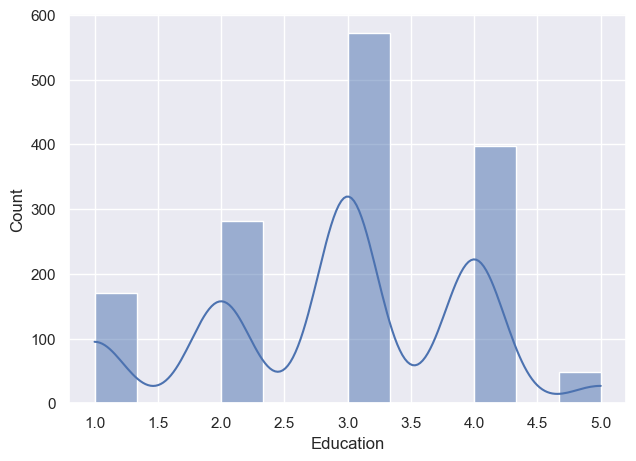

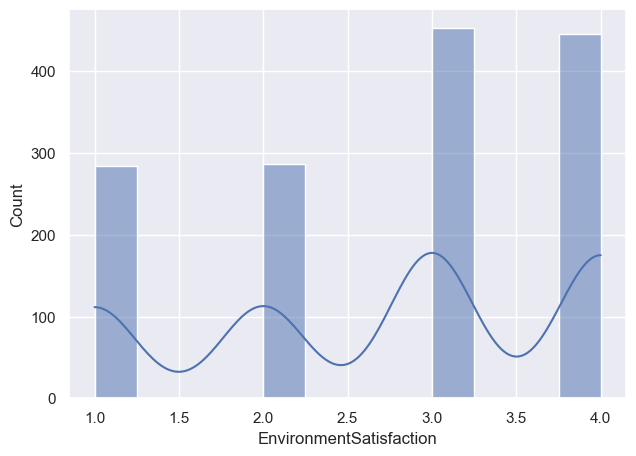

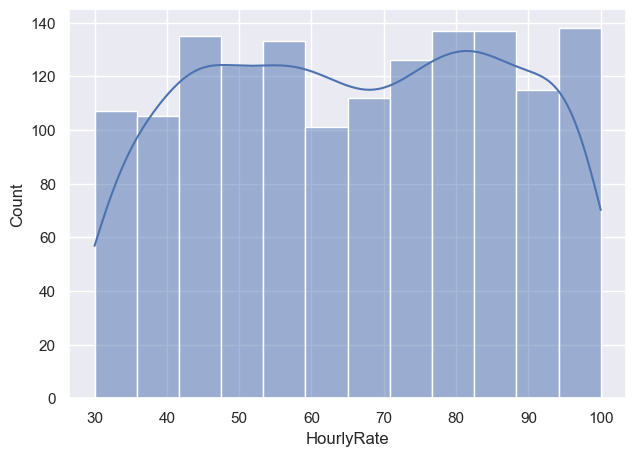

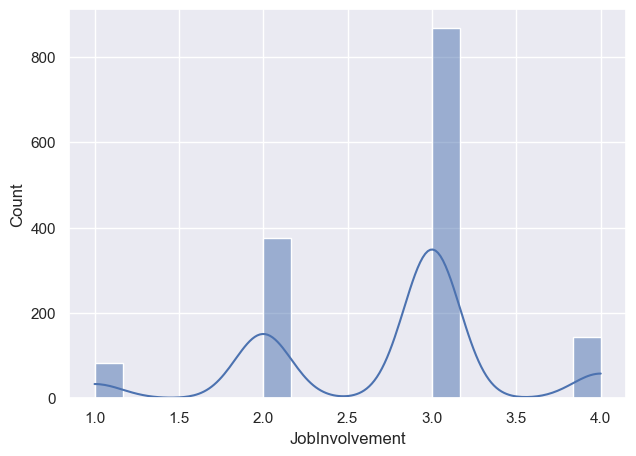

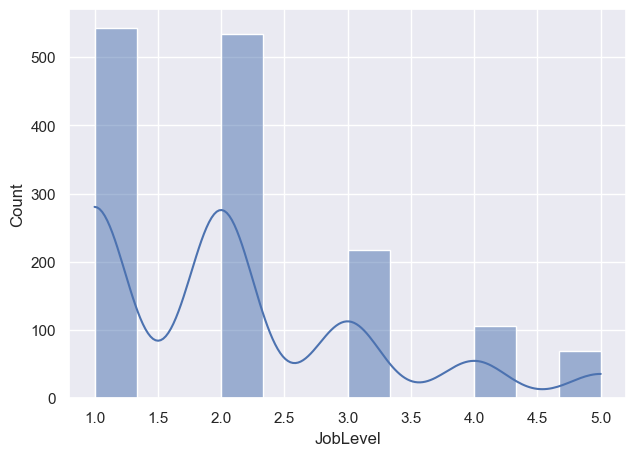

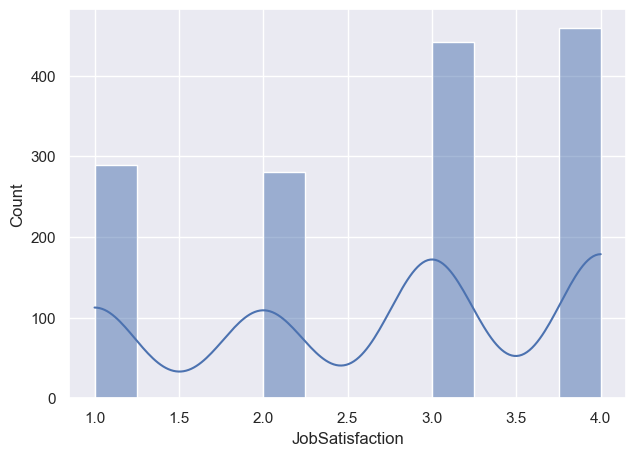

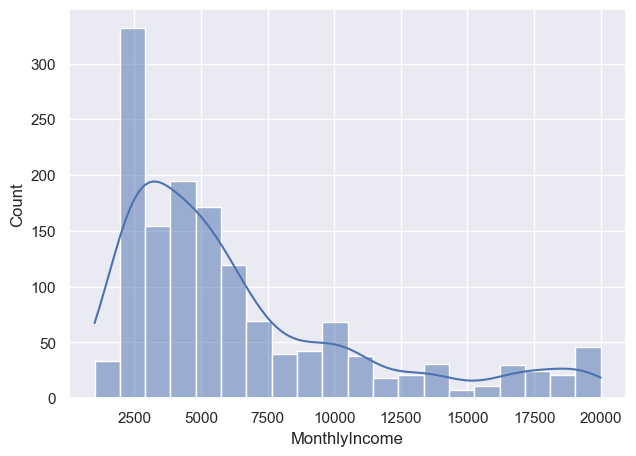

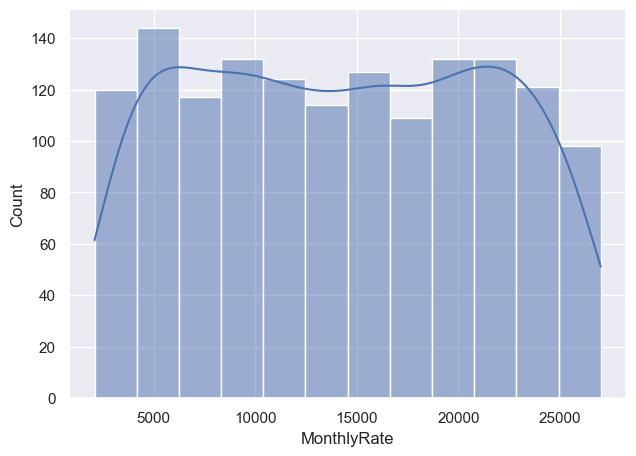

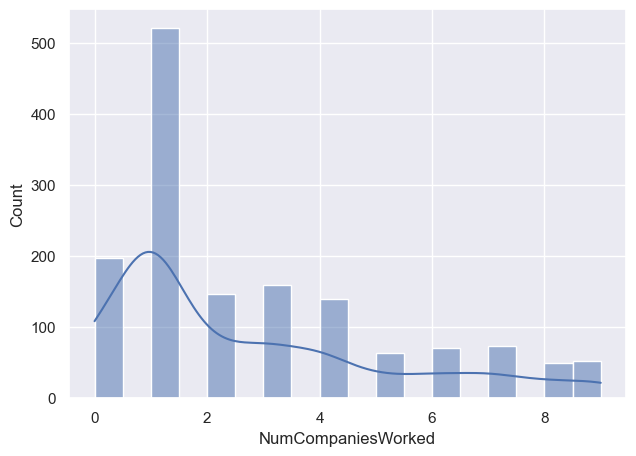

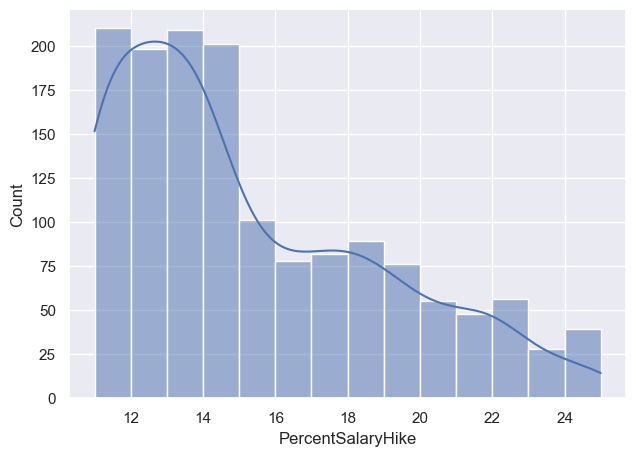

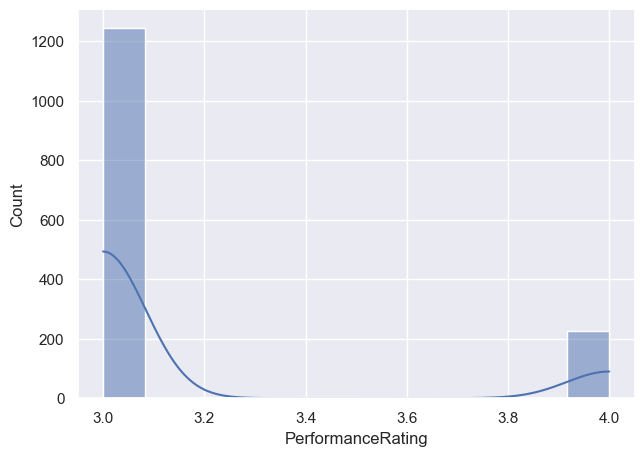

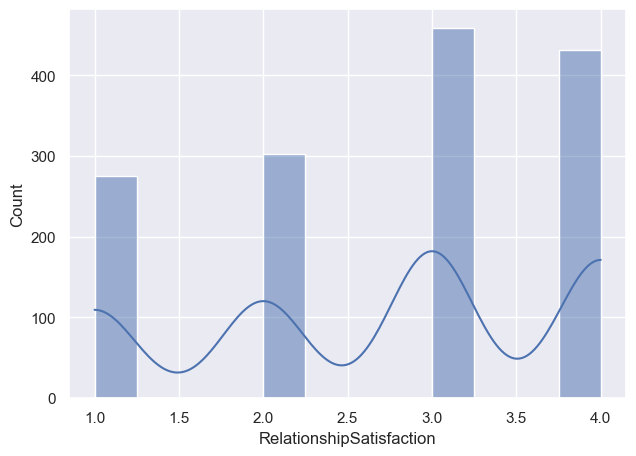

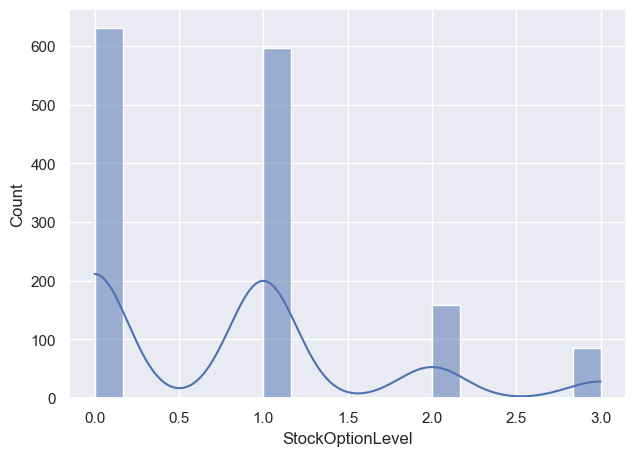

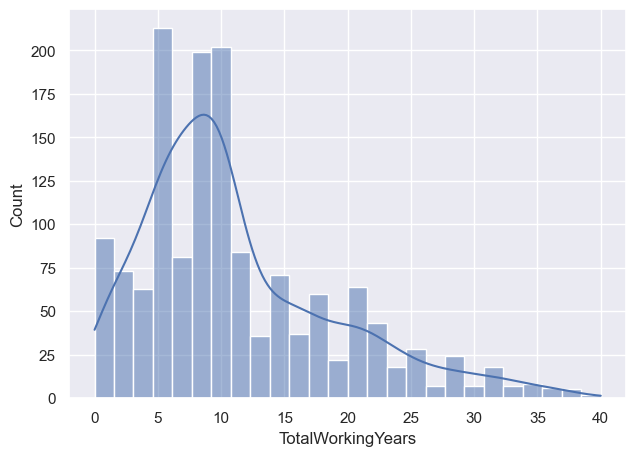

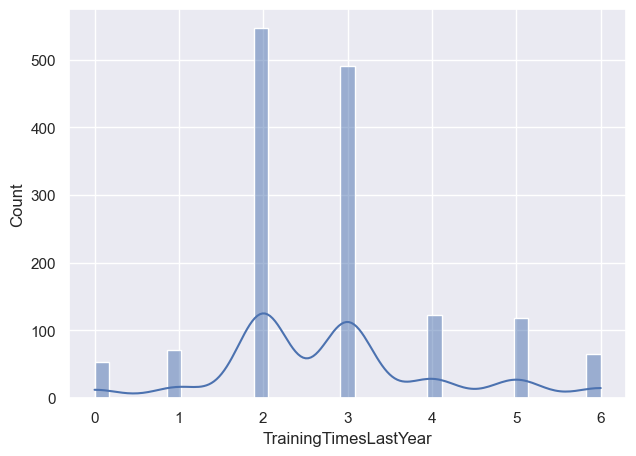

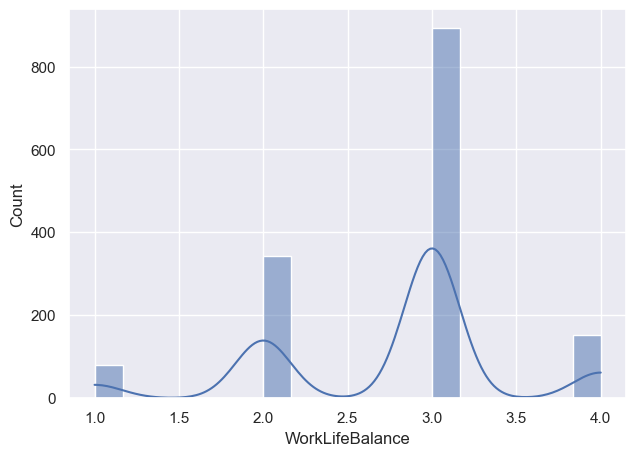

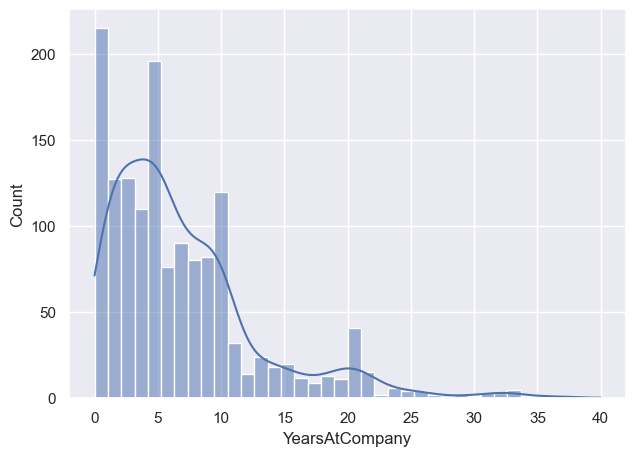

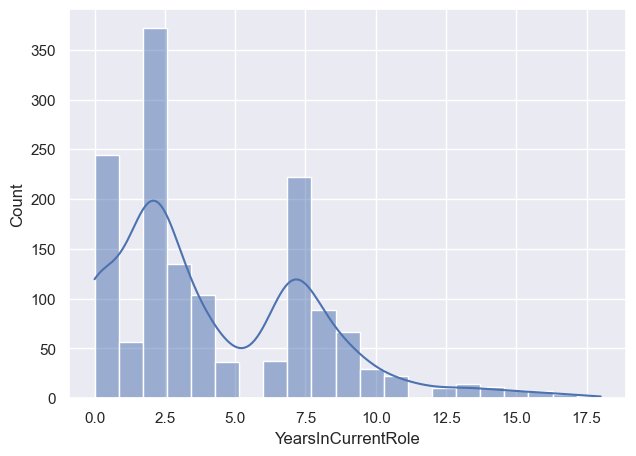

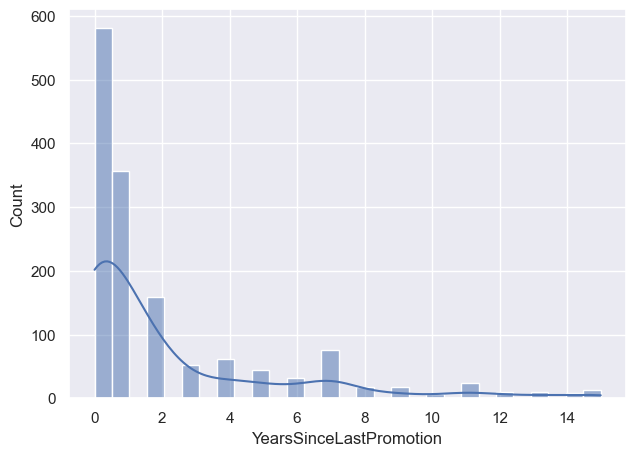

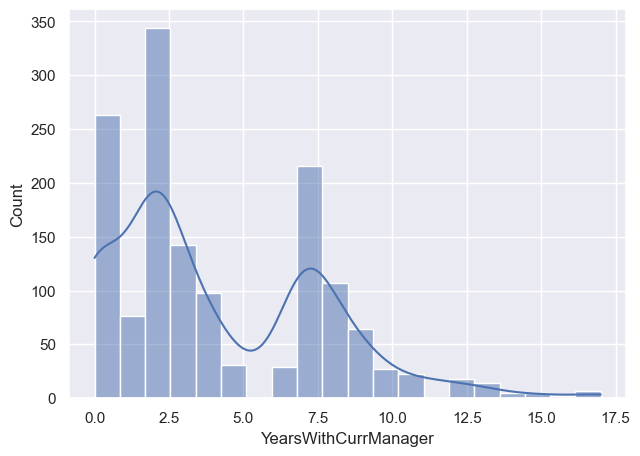

In [15]:
## numeric columns
for col in num_col:
    sns.histplot(hr[col],kde=True)
    plt.show()

In [16]:
## object columns
for i in obj_col:
      
    fig=px.bar(data_frame=hr[i].value_counts(),text_auto=True)
    fig.update_layout(title="Distribution of " + i)
    fig.update_layout(xaxis_title= i)
    fig.update_traces(textposition='outside')
    fig.update_layout(title_x=.5)
    fig.show()

## Bivariate Analyses

In [17]:
## Relation between Attrition and object columns 
col=['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']
for i in col:
    ee=hr.groupby(i)['Attrition'].count().reset_index().sort_values('Attrition',ascending=False)
    fig = px.bar(ee, x=i,y="Attrition",text_auto=True)
    fig.update_layout(title="Relation between Attrition and  " + i)
    fig.update_layout(xaxis_title= i)
    fig.update_traces(textposition='outside')
    fig.update_layout(title_x=.5)
    fig.show()
        
    

In [18]:
## Relation between Attrition and Numiric Columns 
col=['Age','DistanceFromHome','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked',
 'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for i in col:
    ee=hr.groupby(i)['Attrition'].count().reset_index().sort_values('Attrition',ascending=False)
    fig = px.bar(ee, x=i,y="Attrition",text_auto=True)
    fig.update_layout(title="Relation between Attrition and  " + i)
    fig.update_layout(xaxis_title= i)
    fig.update_traces(textposition='outside')
    fig.update_layout(title_x=.5)
    fig.show()

## Multivariate Analyses

In [19]:
obj_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [20]:
col=['Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

for i in col:
    be=hr.groupby([i,'BusinessTravel'])["Attrition"].count().reset_index().sort_values('Attrition',ascending=False)  
    fig=px.bar(data_frame=be,x=i,y="Attrition",color='BusinessTravel',barmode='group',text_auto=True)
    fig.update_layout(title="Attrition with " + i + ' and  BusinessTravel')
    fig.update_layout(xaxis_title= i)
    fig.update_traces(textposition='outside')
    fig.update_layout(title_x=.5)
    fig.show()


In [21]:
col=['BusinessTravel','EducationField','Gender','JobRole','MaritalStatus','OverTime']

for i in col:
    be=hr.groupby([i,'Department'])["Attrition"].count().reset_index().sort_values('Attrition',ascending=False)  
    fig=px.bar(data_frame=be,x=i,y="Attrition",color='Department',barmode='group',text_auto=True)
    fig.update_layout(title="Attrition with " + i + ' and  Department')
    fig.update_layout(xaxis_title= i)
    fig.update_traces(textposition='outside')
    fig.update_layout(title_x=.5)
    fig.show()

In [22]:
col=['BusinessTravel','Department','Gender','JobRole','MaritalStatus','OverTime']

for i in col:
    be=hr.groupby([i,'EducationField'])["Attrition"].count().reset_index().sort_values('Attrition',ascending=False)  
    fig=px.bar(data_frame=be,x=i,y="Attrition",color='EducationField',barmode='group',text_auto=True)
    fig.update_layout(title="Attrition with " + i + ' and  EducationField')
    fig.update_layout(xaxis_title= i)
    fig.update_traces(textposition='outside')
    fig.update_layout(title_x=.5)
    fig.show()

In [23]:
col=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime']

for i in col:
    be=hr.groupby([i,'Gender'])["Attrition"].count().reset_index().sort_values('Attrition',ascending=False)  
    fig=px.bar(data_frame=be,x=i,y="Attrition",color='Gender',barmode='group',text_auto=True)
    fig.update_layout(title="Attrition with " + i + ' and  Gender')
    fig.update_layout(xaxis_title= i)
    fig.update_traces(textposition='outside')
    fig.update_layout(title_x=.5)
    fig.show()

In [24]:
col=['BusinessTravel','Department','EducationField','Gender','MaritalStatus','OverTime']

for i in col:
    be=hr.groupby([i,'JobRole'])["Attrition"].count().reset_index().sort_values('Attrition',ascending=False)  
    fig=px.bar(data_frame=be,x=i,y="Attrition",color='JobRole',barmode='group',text_auto=True)
    fig.update_layout(title="Attrition with " + i + ' and  JobRole')
    fig.update_layout(xaxis_title= i)
    fig.update_traces(textposition='outside')
    fig.update_layout(title_x=.5)
    fig.show()


In [25]:
col=[
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 
 'OverTime']

for i in col:
    be=hr.groupby([i,'MaritalStatus'])["Attrition"].count().reset_index().sort_values('Attrition',ascending=False)  
    fig=px.bar(data_frame=be,x=i,y="Attrition",color='MaritalStatus',barmode='group',text_auto=True)
    fig.update_layout(title="Attrition with " + i + ' and  MaritalStatus')
    fig.update_layout(xaxis_title= i)
    fig.update_traces(textposition='outside')
    fig.update_layout(title_x=.5)
    fig.show()

In [26]:
col=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']

for i in col:
    be=hr.groupby([i,'OverTime'])["Attrition"].count().reset_index().sort_values('Attrition',ascending=False)  
    fig=px.bar(data_frame=be,x=i,y="Attrition",color='OverTime',barmode='group',text_auto=True)
    fig.update_layout(title="Attrition with " + i + ' and  OverTime')
    fig.update_layout(xaxis_title= i)
    fig.update_traces(textposition='outside')
    fig.update_layout(title_x=.5)
    fig.show()